# Math 387 Lab Assignment 2
David Knapik
260607757

In [144]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import copy
from PIL import Image

We write a function that takes $n$ as its parameter and generates an $n \times n$ matrix, whose entries are random numbers uniformly distributed in $[−1,1]$.

In [91]:
def creatematrix(n):
    A=np.random.uniform(-1,1,(n,n))
    return A

Now, we implement Gaussian elimination with partial pivoting.

In [138]:
E = creatematrix(5) #example matrix
print(E)

[[-0.83684413 -0.40029658 -0.11838522 -0.89056954 -0.95943704]
 [-0.1679869  -0.81515637 -0.46937024  0.92488922 -0.28819002]
 [-0.103376    0.19203385  0.23692722 -0.69033016 -0.62087486]
 [-0.27344582 -0.78989568  0.03482533 -0.60096202  0.59867177]
 [-0.95109505 -0.85247935  0.71919812  0.15663039  0.40340704]]


In [86]:
def GEPP(A, doPricing = True):  #Gaussian Elimination with Partial Pivoting. 
    #The input is A --> our matrix which is nxn
    l=len(A)
    
    for k in range(l-1): #k is the current pivot row 
        if doPricing:
            # Pivoting
            maxindex = abs(A[k:,k]).argmax() + k
            if A[maxindex, k] == 0:
                raise ValueError("Matrix is singular")
            # Swapping
            if maxindex != k:
                A[[k,maxindex]] = A[[maxindex, k]]
        else:
            if A[k, k] == 0:
                raise ValueError("pivot element is zero")
    
        for row in range(k+1, l):
            multiplier = A[row,k]/A[k,k]
            A[row, k:] = A[row, k:] - multiplier*A[k, k:]
            
    return A #Returns an upper triangular matrix after the GEPP procedure.


In [134]:
GEPP(E) #Testing the GEPP

array([[ 0.94587463, -0.2950987 ,  0.34306065, -0.17994405,  0.44769853],
       [ 0.        , -1.02372278, -0.54965416,  0.55502279,  1.09991334],
       [ 0.        ,  0.        , -0.30234763,  1.10856827,  0.5003346 ],
       [ 0.        ,  0.        ,  0.        , -1.53046918, -1.62474401],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.48817288]])

To calculate the growth factor:

In [157]:
def gf(A):
    U=copy.copy(A)
    B=GEPP(U)
    a = max(B.min(),B.max(),key = abs) #max of |uij|
    b = max(A.min(),A.max(),key = abs) #max of |aij|
    return abs(a/b)

In [142]:
gf(E) #test example

1.612416798633729

Now, we plot the growth factor against the matrix size.

In [158]:
Matrices = []  
for n in range(10,1000,5):
    Matrices.append(creatematrix(n))

In [159]:
GrowthFactors = []
for x in Matrices:
    GrowthFactors.append(gf(x))


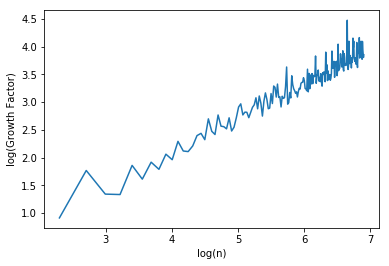

In [163]:
xlist = [range(10,1000,5)]
plt.plot((np.log(xlist)).flatten(), np.log(GrowthFactors))
plt.xlabel('log(n)')
plt.ylabel('log(Growth Factor)')
plt.show()

Considering the above plot, we estimate that $\alpha \approx 0.5$. So, compared to the worst case scenario $g \approx 2^n$, we have that $g \approx c \sqrt{n}$, so we are doing much better than the worst case scenario.

Now lets fix $n = 10$.

In [166]:
MatricesTen = []
count = 0 
while (count < 500):
    MatricesTen.append(creatematrix(10))
    count = count + 1

In [167]:
GrowthFactorsTen=[]
for x in MatricesTen:
    GrowthFactorsTen.append(gf(x))

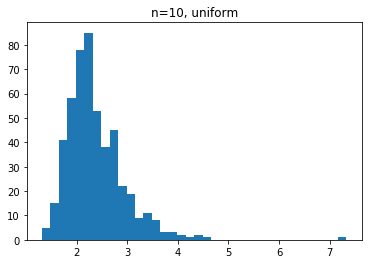

In [168]:
plt.hist(GrowthFactorsTen,bins='auto')
plt.title('n=10, uniform')
plt.show()

Repeat for $n=20,64,128$.

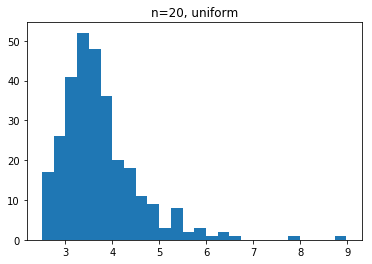

In [169]:
MatricesTwenty = []
count = 0 
while (count < 300):
    MatricesTwenty.append(creatematrix(20))
    count = count + 1
    
GrowthFactorsTwenty=[]
for x in MatricesTwenty:
    GrowthFactorsTwenty.append(gf(x))
    
plt.hist(GrowthFactorsTwenty,bins='auto')
plt.title('n=20, uniform')
plt.show()

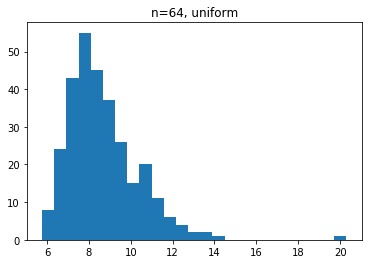

In [170]:
Matrices64 = []
count = 0 
while (count < 300):
    Matrices64.append(creatematrix(64))
    count = count + 1
    
GrowthFactors64=[]
for x in Matrices64:
    GrowthFactors64.append(gf(x))
    
plt.hist(GrowthFactors64,bins='auto')
plt.title('n=64, uniform')
plt.show()

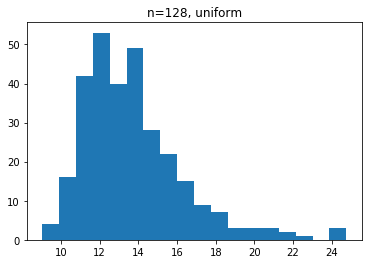

In [171]:
Matrices128 = []
count = 0 
while (count < 300):
    Matrices128.append(creatematrix(128))
    count = count + 1
    
GrowthFactors128=[]
for x in Matrices128:
    GrowthFactors128.append(gf(x))
    
plt.hist(GrowthFactors128,bins='auto')
plt.title('n=128, uniform')
plt.show()

Considering the above plots, our approximation for the PDF of the growth factors is a Skew Normal Distribution. Our conjecture on how the PDF decays as the growth factor gets large is that it is an exponential decay.